# Verificar as regiões de maior modificação nas regiões das proteínas NS1, NS3 e NS5 de Zika vírus.

# Prepare IDE

In [1]:
#!pip install tqdm
#!pip install biopython
#!pip install pandas
#!pip install seaborn
#!pip install rpy2
#!pip install numpy 

# Imports

In [1]:
import pandas as pd

# Custom libraries 

In [2]:
import WorkFunctions as wFunc
import WorkFlow as wFlow
import Graphs as gr

# Read files

In [3]:
protein = "read/Protein - C_NS5"
fastaProSequences = wFunc.fileRead(protein, ".fa")

# Make DataFrames
 - Fasta DataFrames

In [4]:
%%time
columns=["ID", "Host", "Region", "Date", "FullSeq"]
#Make DataFrames
fastaProDF = wFunc.makeDF(columns, fastaProSequences)
nsFiles = wFunc.readPDBs()

Wall time: 1.81 s


In [5]:
fastaProDF.head(2)

,ID,Host,Region,Date,FullSeq
0,AQU12485,Homo sapiens,Brazil,2016-01-08,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...
1,AMS00611,Homo sapiens,Italy,2016-03-06,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...


# Read PDBs

In [6]:
%%time
#dataList = ['5GS6', '5IY3', '5K6K', '5JMT', "5TMH"]
saveList, delList = wFunc.choseOne(-1)
cover, aminoDegrees, cleanedDF, strangeDF, poliListAmino, poliListDegree = wFunc.readOrCreate(nsFiles, fastaProDF, delList, saveList)

Ok, just reading!
Reading PDB: 5GS6
Reading PDB: 5IY3
Reading PDB: 5K6K
Reading PDB: 5JMT
Reading PDB: 5TMH
Reading PDB: 5GS6
Reading PDB: 5IY3
Reading PDB: 5K6K
Reading PDB: 5JMT
Reading PDB: 5TMH
Wall time: 1.53 s


In [7]:
cover.head()

,Protein,Sample_ID,Seq,Cover
0,5JMT,AMS00611,PVDCFEPSMLKKKQLTVLDLHPGAGKTRRVLPEIVREAIKTRLRTV...,90.293454
1,5TMH,AMS00611,TLGEKWKARLNQMSALEFYSYKKSGITEVCREEARRALKDGVATGG...,87.104072
2,5GS6,AMS00611,VGCSVDFSKKETRCGTGVFVYNDVEAWRDRYKYHPDSPRRLAAAVK...,90.883191
3,5IY3,AMS00611,LKVREDYSLECDPAVIGTAVKGKEAVHSDLGYWIESEKNDTWRLKR...,87.500000
4,5K6K,AMS00611,DVGCSVDFSKKETRCGTGVFVYNDVEAWRDRYKYHPDSPRRLAAAV...,90.625000


In [8]:
aminoDegrees.head()

,ID,Protein,Seq,Len
0,AMS00611,5JMT,"P,1|V,5|D,-2|C,2|F,4|E,1|P,1|S,1|M,4|L,7|K,3|K...",1825
1,AMS00611,5TMH,"T,3|L,6|G,3|E,2|K,5|W,12|K,4|A,4|R,3|L,6|N,3|Q...",3640
2,AMS00611,5GS6,"V,2|G,2|C,3|S,2|V,2|D,4|F,4|S,-2|K,3|K,2|E,2|T...",1442
3,AMS00611,5IY3,"L,5|K,-2|V,2|R,4|E,2|D,1|Y,1|S,4|L,2|E,2|C,5|D...",757
4,AMS00611,5K6K,"D,3|V,4|G,1|C,3|S,2|V,2|D,7|F,2|S,1|K,3|K,4|E,...",1439


In [9]:
#pList = strangeDF.Protein.unique().tolist()
#wFunc.fixStrangeDF(pList, cover, aminoDegrees, strangeDF, fastaProDF, nsFiles)

In [10]:
## Erros ecncontrados
print(len(strangeDF))
strangeDF

0


,ID,Protein,Seq,Len


## Identidades em todas as amostras

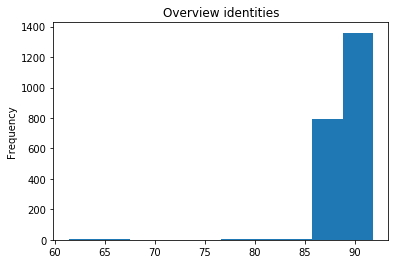

Wall time: 381 ms


In [11]:
%%time
gr.plotCoverRange(cover)

## Salvar Fasta

## Separar as amostras em seus respectivos DF para análise de grau

## Plotting polimorphisms

In [262]:
"""
Hydrophobic Side Chain -> Verde
Witho Polar Uncharged Side Chains -> Roxo
Special Cases -> Amarelo
Electrically charged Side Chains 
    Positive -> Azul Escuro
    Negative -> Azul Claro

""" 
print()

Overview PDB 5GS6:


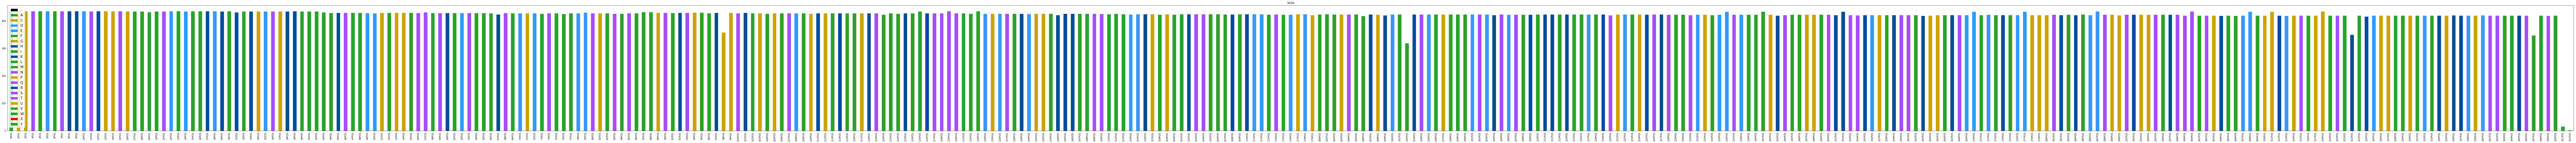

Polimorphism PDB 5GS6:


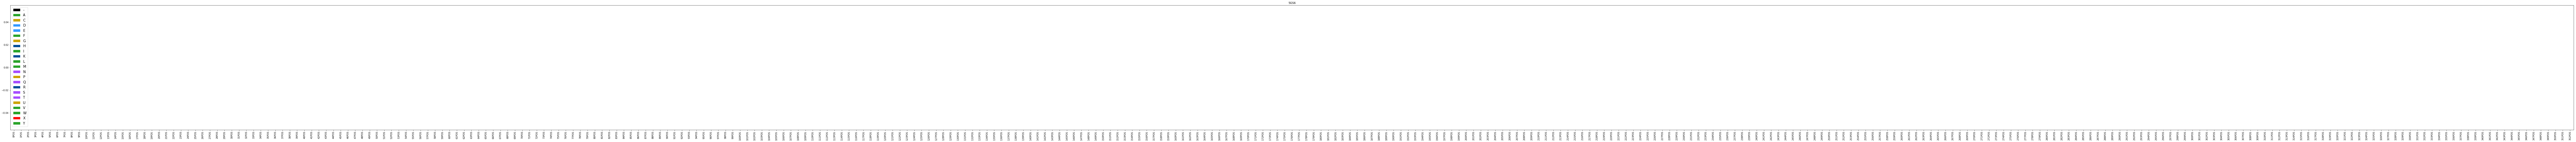

Wall time: 28.6 s


In [12]:
%%time
gr.plotPolimorph(saveList, poliListAmino, "5GS6", True, 4)

Overview PDB 5GS6:


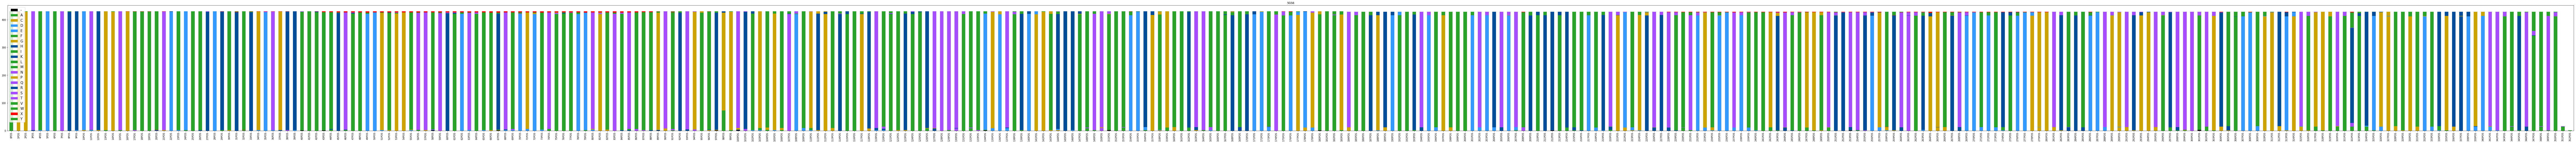

Polimorphism PDB 5GS6:


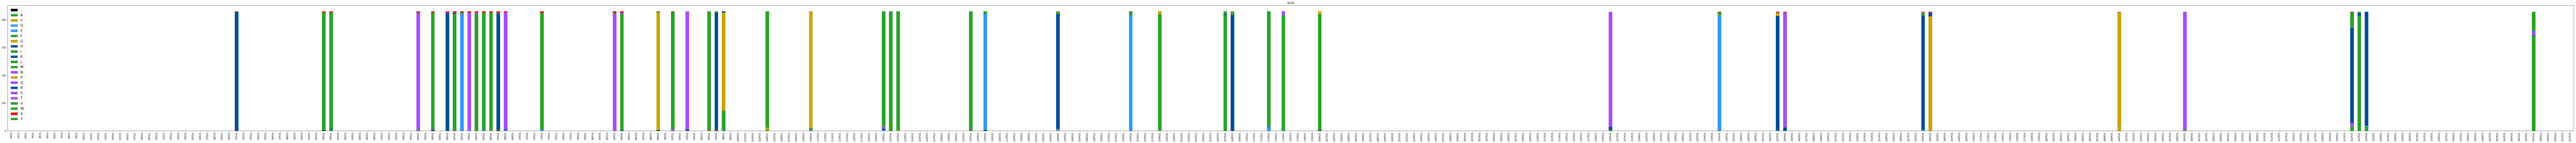

Overview PDB 5IY3:


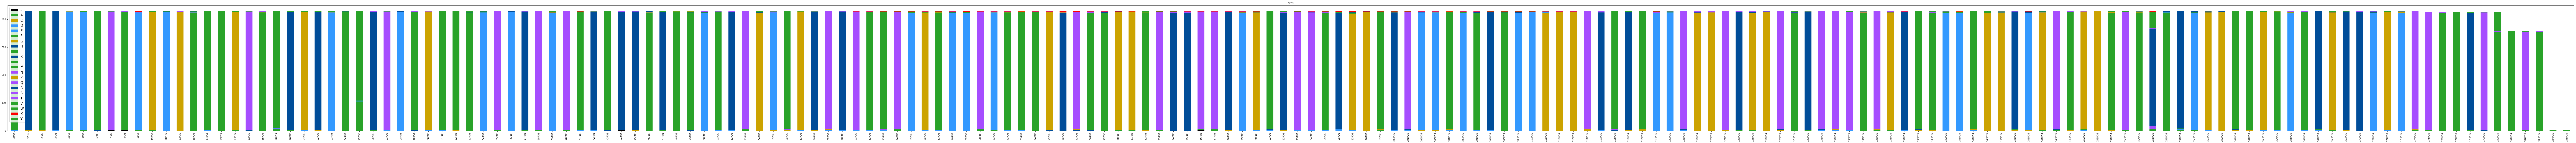

Polimorphism PDB 5IY3:


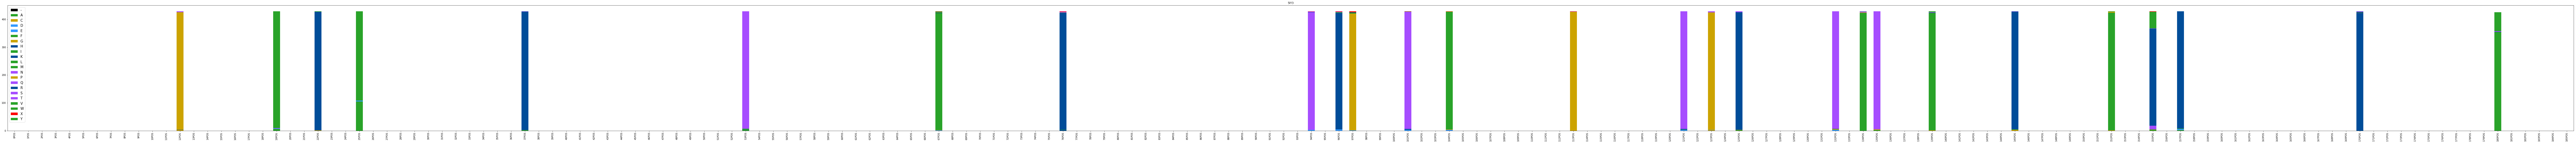

Overview PDB 5K6K:


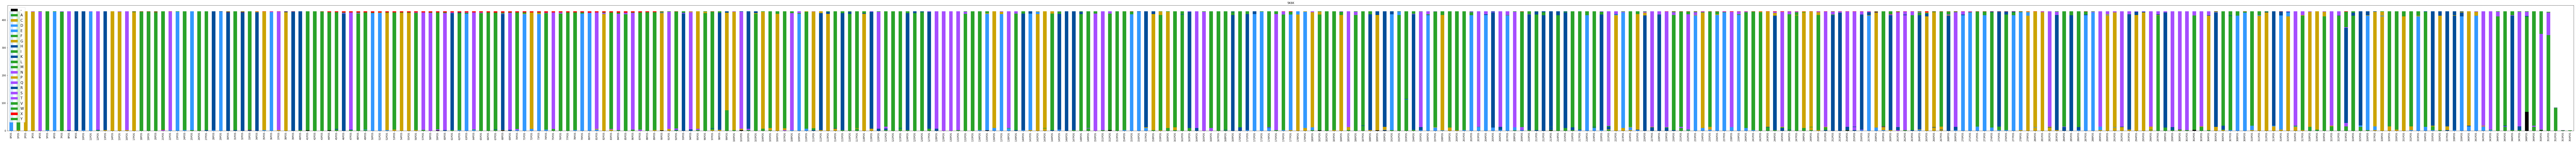

Polimorphism PDB 5K6K:


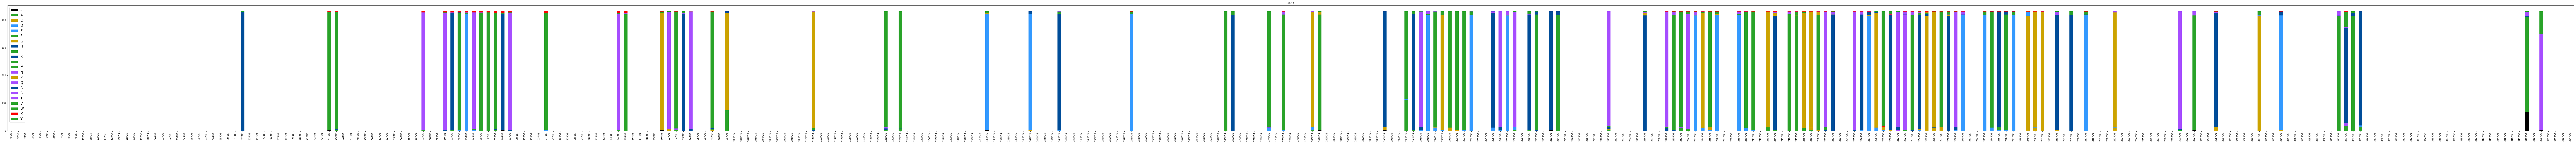

Overview PDB 5JMT:


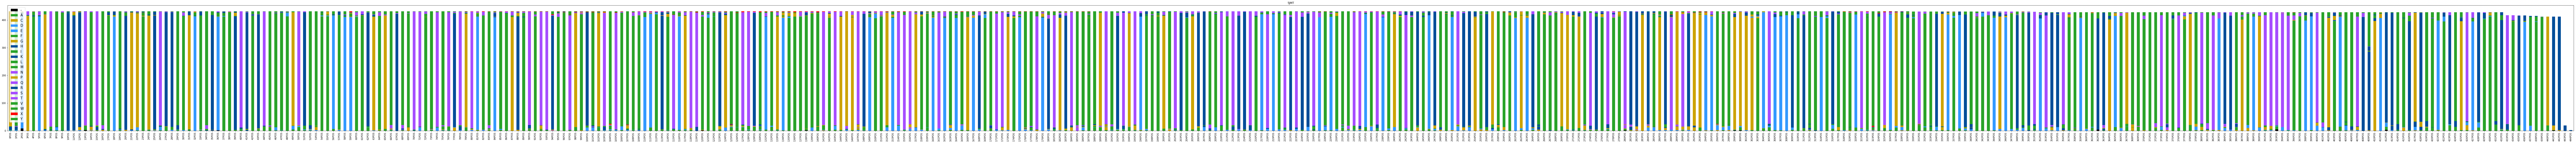

Polimorphism PDB 5JMT:


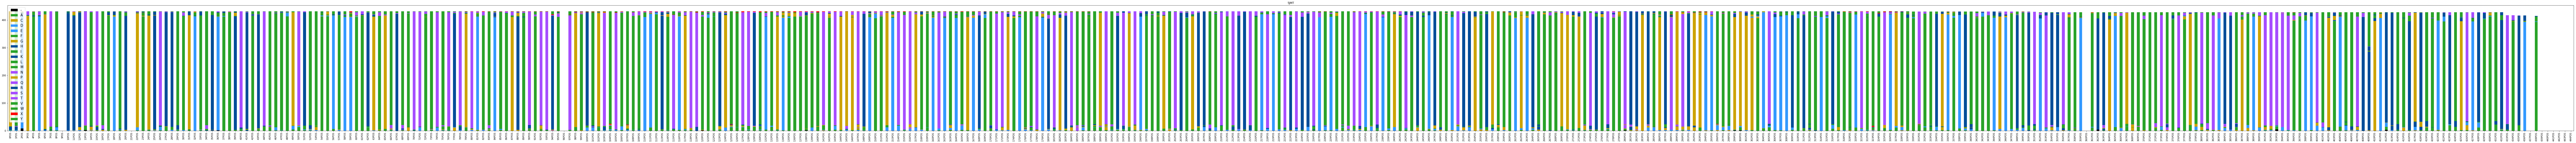

Overview PDB 5TMH:


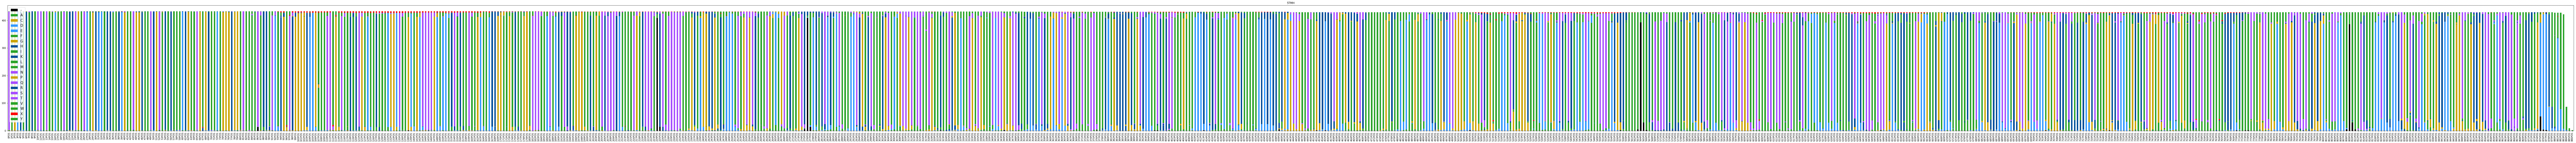

Polimorphism PDB 5TMH:


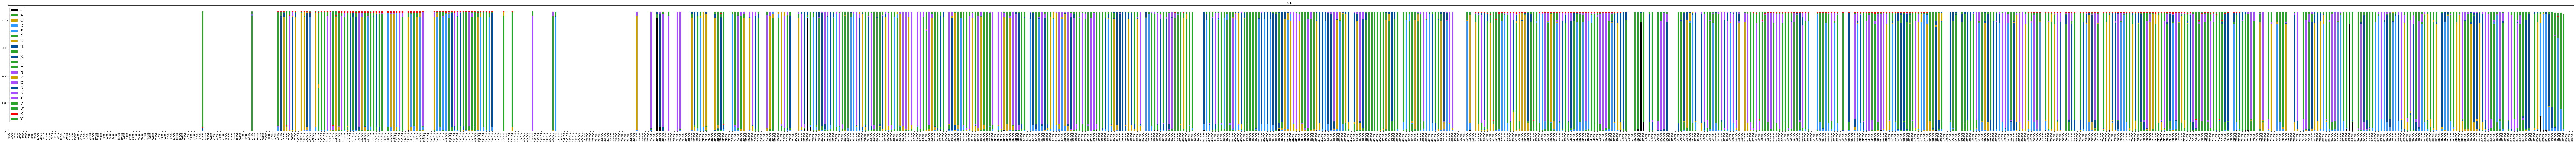

Wall time: 4min 14s


In [14]:
%%time
gr.plotPolimorph(saveList, poliListAmino, "all", True, 4)

## Samples

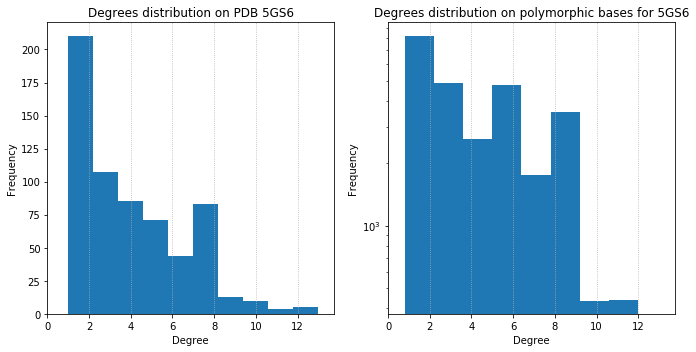

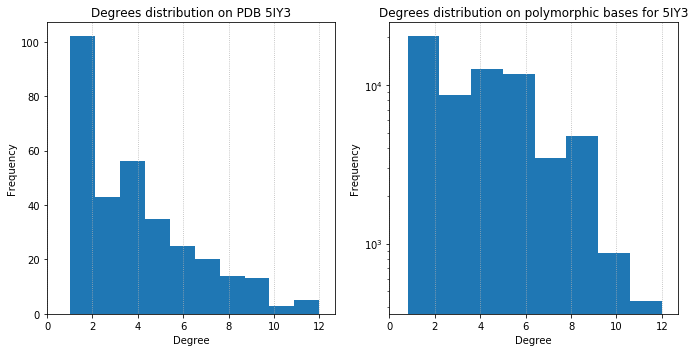

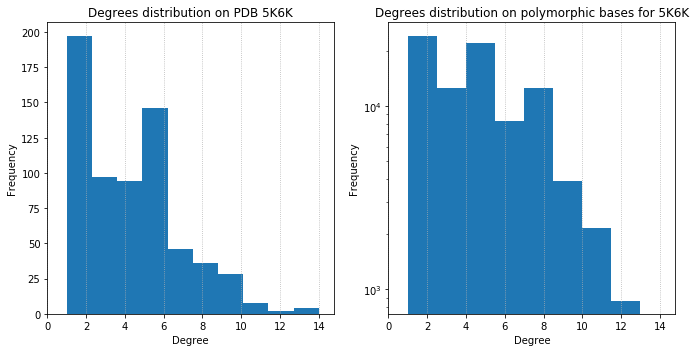

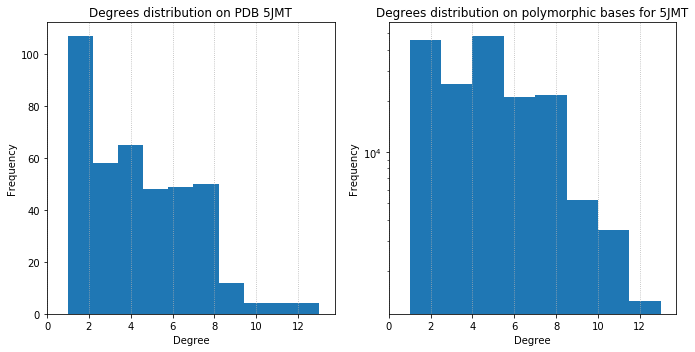

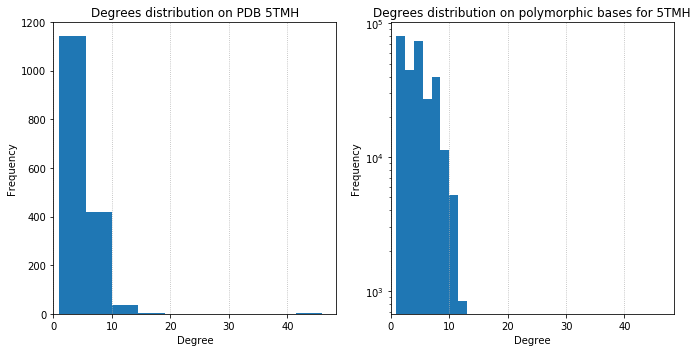

Wall time: 20.4 s


In [7]:
%%time
gr.plotDegrees(saveList, nsFiles, poliListDegree, poliListAmino, "all", 4, False)

In [13]:
nsFiles["5TMH"].Degree.describe()

count    1603.000000
mean        4.281971
std         2.926967
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        46.000000
Name: Degree, dtype: float64

In [16]:
nsFiles["5TMH"][nsFiles["5TMH"].Degree > 15]

,NodeId,Chain,Position,Residue,Dssp,Degree,Bfactor_CA,x,y,z,pdbFileName,Rapdf,Tap,Accessibility
798,A:1001:_:SAH,A,1001,SAH,NaN,45,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1001.A,-999.9,-999.9,-999.9
799,A:1002:_:ZN,A,1002,ZN,NaN,18,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1002.A,-999.9,-999.9,-999.9
800,A:1003:_:ZN,A,1003,ZN,NaN,16,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1003.A,-999.9,-999.9,-999.9
1597,B:1001:_:SAH,B,1001,SAH,NaN,46,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1001.B,-999.9,-999.9,-999.9
1598,B:1002:_:ZN,B,1002,ZN,NaN,18,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1002.B,-999.9,-999.9,-999.9
1599,B:1003:_:ZN,B,1003,ZN,NaN,16,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1003.B,-999.9,-999.9,-999.9


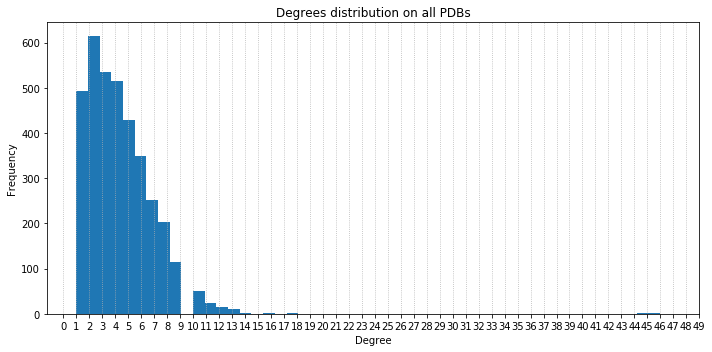

Wall time: 2.84 s


In [11]:
%%time
gr.allPDBs(nsFiles)

# Btweeness

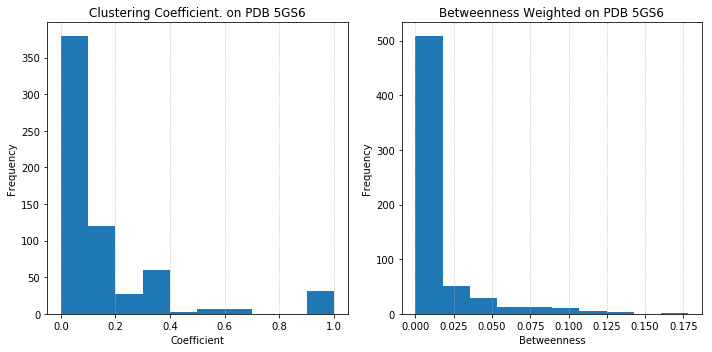

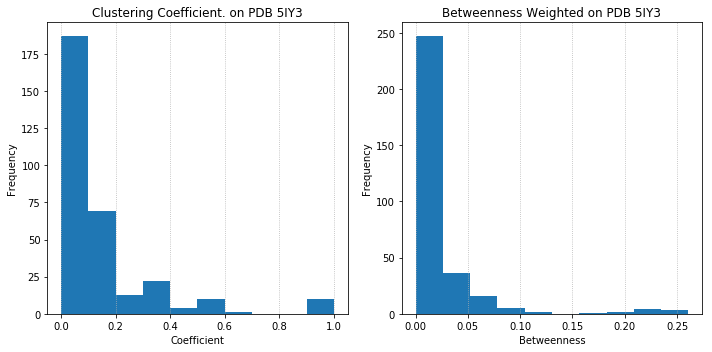

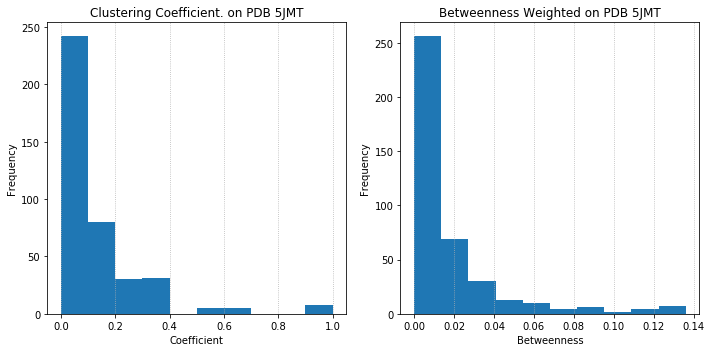

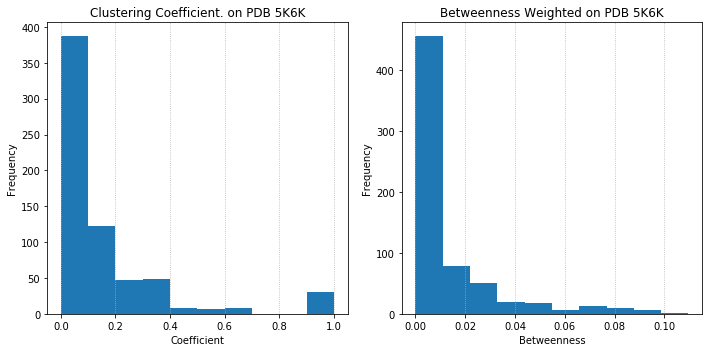

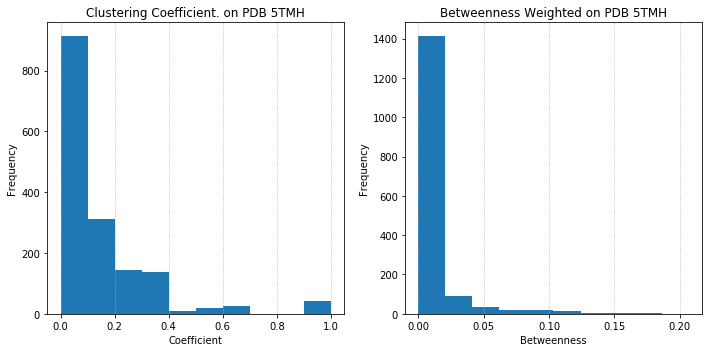

In [12]:
data = pd.read_csv("read/nodesResultCsv.csv", sep="\t")
names = data.filename.unique().tolist()

for ii in names:
    gr.plotBtw(data[data.filename == ii], ii)

In [249]:
def returnIdList(poliListAmino, poliListDegree, polimorfValue, degreeValues):
    poliList = wFunc.findPoli(poliListAmino, polimorfValue)
    temp = poliListDegree[poliListDegree[poliList.columns] > degreeValues].dropna(how="all", axis=1)
    temp2 = poliListDegree.iloc[:,:1].copy()
    return temp2.join(temp).ID.tolist()

temp = returnIdList(poliListAmino[0], poliListDegree[0], 4, 8)

In [238]:
poliListAmino[0]["261POS"].head()

0    Q
1    Q
2    Q
3    Q
4    Q
Name: 261POS, dtype: object

In [241]:
temp.describe()

,67POS,225POS,228POS,229POS,230POS,233POS,251POS,253POS,254POS,258POS,259POS,260POS,261POS,262POS,263POS,266POS,267POS,268POS
count,3.0,1.0,433.0,12.0,1.0,1.0,421.0,1.0,1.0,421.0,12.0,2.0,421.0,12.0,2.0,421.0,12.0,2.0
mean,12.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,11.0,11.0,11.0,10.0,10.0,10.0
std,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,12.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,11.0,11.0,11.0,10.0,10.0,10.0
25%,12.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,11.0,11.0,11.0,10.0,10.0,10.0
50%,12.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,11.0,11.0,11.0,10.0,10.0,10.0
75%,12.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,11.0,11.0,11.0,10.0,10.0,10.0
max,12.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,11.0,11.0,11.0,10.0,10.0,10.0


In [240]:
temp.head()

,67POS,225POS,228POS,229POS,230POS,233POS,251POS,253POS,254POS,258POS,259POS,260POS,261POS,262POS,263POS,266POS,267POS,268POS
0,NaN,NaN,9.0,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,11.0,NaN,NaN,10.0,NaN,NaN
1,NaN,NaN,9.0,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,11.0,NaN,NaN,10.0,NaN,NaN
2,NaN,NaN,9.0,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,11.0,NaN,NaN,10.0,NaN,NaN
3,NaN,NaN,9.0,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,11.0,NaN,NaN,10.0,NaN,NaN
4,NaN,NaN,9.0,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,11.0,NaN,NaN,10.0,NaN,NaN


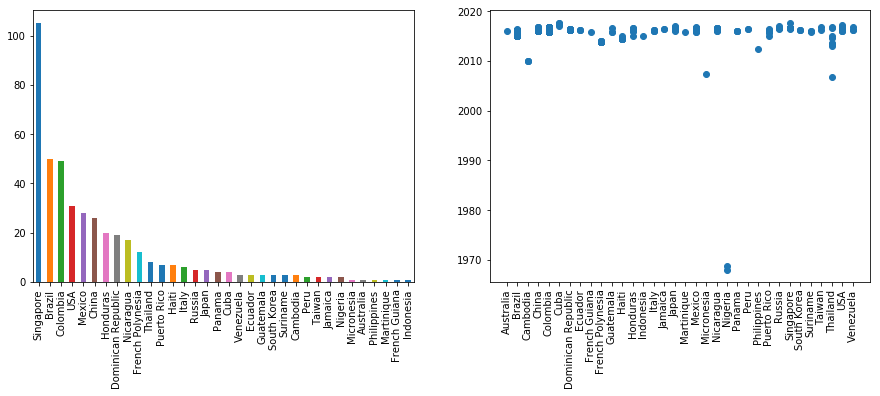

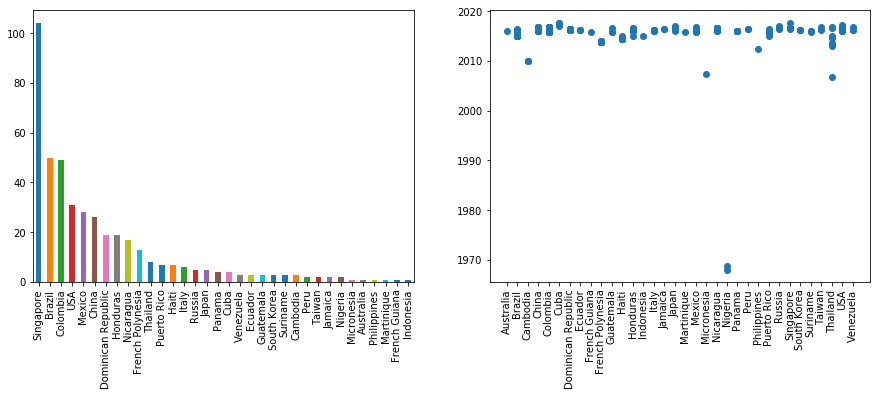

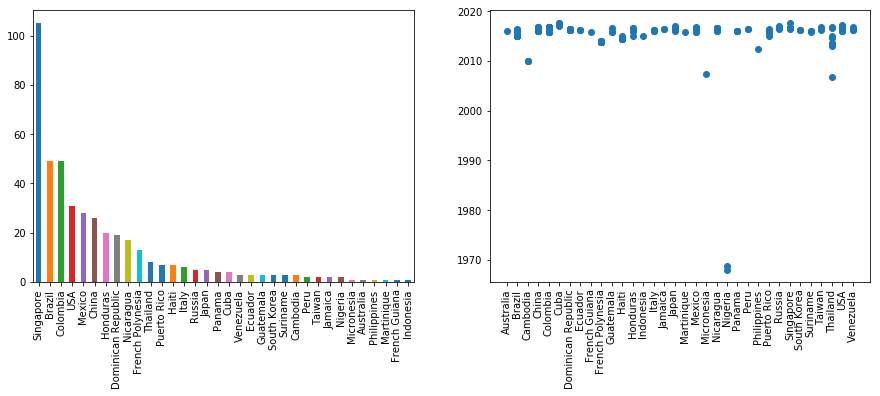

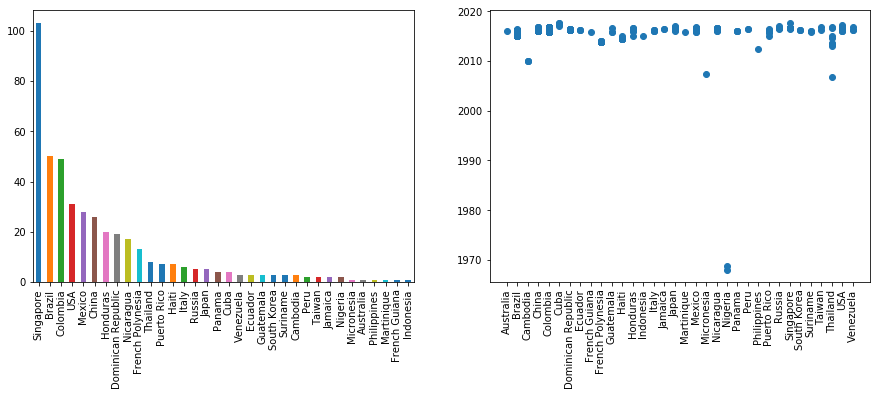

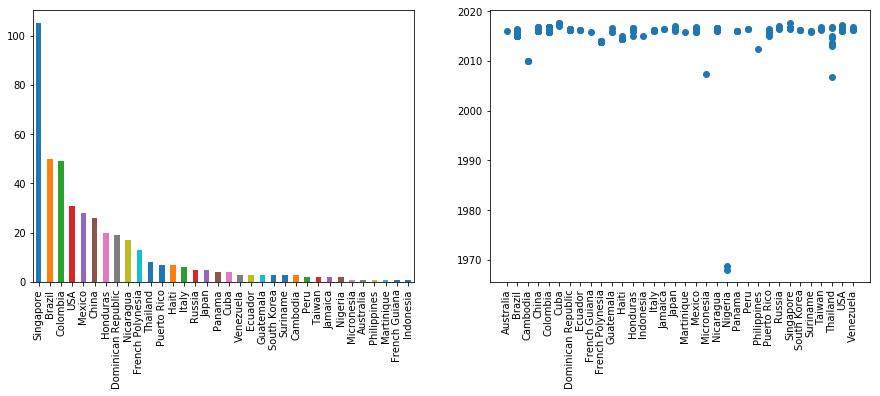

In [250]:
dataList = ['5GS6', '5IY3', '5K6K', '5JMT', "5TMH"]
for ii, jj in enumerate(dataList):
    temp = returnIdList(poliListAmino[ii], poliListAmino[ii], 4, 8)
    temp2 = pd.DataFrame()
    for kk in temp:
        tam = len(temp2)
        temp2.loc[tam, "ID"] = kk
        temp2.loc[tam, "Region"] = fastaProDF[fastaProDF.ID == kk].Region.values[0]
        temp2.loc[tam, "Date"] = fastaProDF[fastaProDF.ID == kk].Date.values[0]
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])
    temp2.Region.value_counts().plot(kind="bar", ax=ax1)
    ax2.plot_date(temp2.Region, temp2.Date)
    ax2.xaxis.set_tick_params(rotation=90, labelsize=10)
    plt.show()